# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

#Have stored API keys in separate folder. Therefore use ConfigParser to grab correct API key
from configparser import ConfigParser
config = ConfigParser()
config.read('../api_keys.cfg')

api_key = config.get('openweather', 'weather_api_key')

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0:5])

593
['chuy', 'hithadhoo', 'richards bay', 'ahipara', 'punta arenas']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create lists to store the weather information
cities_final = []
lat = []
lon = []
max_temp=[]
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#Create variable to hold record and set number
record = 1

#Use openweather API and query by city name
base_url = 'https://api.openweathermap.org/data/2.5/weather'

#For each city in the city list, build the search query 
for city in cities:
    query_url = f'{base_url}?q={city}&units=metric&appid={api_key}'
    
    #Make request and store in JSON
    response = requests.get(query_url).json()
    
    #Use a Try/Except to handle cities not found
    try:
        #If a city is found, append their name and weather details to respective lists
        cities_final.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        #Print that the record is being processed
        print(f'Processing Record {record} of Set 1: {city}')
        record = record + 1
    #Otherwise if you get an index error, pass
    except:
        print(f'City "{city}" not found. Continuing...')
        pass

print('-----------------------------')     
print('Data Retrieval Complete!')

Processing Record 1 of Set 1: chuy
Processing Record 2 of Set 1: hithadhoo
Processing Record 3 of Set 1: richards bay
Processing Record 4 of Set 1: ahipara
Processing Record 5 of Set 1: punta arenas
Processing Record 6 of Set 1: ushuaia
Processing Record 7 of Set 1: danielskuil
Processing Record 8 of Set 1: sechura
Processing Record 9 of Set 1: hobart
Processing Record 10 of Set 1: east london
Processing Record 11 of Set 1: sao felix do xingu
Processing Record 12 of Set 1: mataura
Processing Record 13 of Set 1: new norfolk
Processing Record 14 of Set 1: gat
Processing Record 15 of Set 1: hilo
Processing Record 16 of Set 1: huarmey
Processing Record 17 of Set 1: rikitea
Processing Record 18 of Set 1: ribeira grande
Processing Record 19 of Set 1: nikolskoye
Processing Record 20 of Set 1: goderich
Processing Record 21 of Set 1: norman wells
Processing Record 22 of Set 1: luena
Processing Record 23 of Set 1: lokosovo
Processing Record 24 of Set 1: kavieng
Processing Record 25 of Set 1: xin

Processing Record 187 of Set 1: beihai
Processing Record 188 of Set 1: fukue
Processing Record 189 of Set 1: yar-sale
Processing Record 190 of Set 1: marshfield
Processing Record 191 of Set 1: roebourne
Processing Record 192 of Set 1: mogadishu
Processing Record 193 of Set 1: maceio
Processing Record 194 of Set 1: teknaf
Processing Record 195 of Set 1: lasa
Processing Record 196 of Set 1: lorengau
Processing Record 197 of Set 1: aitape
Processing Record 198 of Set 1: saint-joseph
Processing Record 199 of Set 1: dobryanka
Processing Record 200 of Set 1: belyy yar
Processing Record 201 of Set 1: svetlaya
Processing Record 202 of Set 1: torbay
City "vaitupu" not found. Continuing...
Processing Record 203 of Set 1: mabaruma
Processing Record 204 of Set 1: acapulco
Processing Record 205 of Set 1: buala
Processing Record 206 of Set 1: batticaloa
Processing Record 207 of Set 1: georgetown
Processing Record 208 of Set 1: nyurba
Processing Record 209 of Set 1: boa vista
Processing Record 210 of

Processing Record 363 of Set 1: bangassou
Processing Record 364 of Set 1: great yarmouth
Processing Record 365 of Set 1: san lawrenz
Processing Record 366 of Set 1: bandar-e lengeh
Processing Record 367 of Set 1: bethanien
Processing Record 368 of Set 1: luanda
Processing Record 369 of Set 1: prince rupert
Processing Record 370 of Set 1: passo de camaragibe
Processing Record 371 of Set 1: morant bay
Processing Record 372 of Set 1: necochea
Processing Record 373 of Set 1: nanchong
Processing Record 374 of Set 1: matagami
Processing Record 375 of Set 1: vidalia
Processing Record 376 of Set 1: rockingham
Processing Record 377 of Set 1: canico
Processing Record 378 of Set 1: visakhapatnam
Processing Record 379 of Set 1: nioro
City "mrirt" not found. Continuing...
Processing Record 380 of Set 1: batagay-alyta
Processing Record 381 of Set 1: xuanzhou
Processing Record 382 of Set 1: san cristobal
Processing Record 383 of Set 1: santa cruz cabralia
Processing Record 384 of Set 1: coruripe
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# print(len(lat))
# print(len(lon))
# print(len(max_temp))
# print(len(humidity))
# print(len(cloudiness))
# print(len(wind_speed))
# print(len(country))
# print(len(date))
dictionary = {"City": cities_final, "Latitude":lat, "Longitude":lon, 
            "Max Temp":max_temp, "Humidity":humidity, 
            "Cloudiness":cloudiness, "Wind Speed":wind_speed, 
            "Country":country, "Date":date}

cities_pd = pd.DataFrame(dictionary)
cities_pd.index.rename("City ID", inplace = True)

cities_pd.to_csv('../output_data/weatherpy_cities.csv')

cities_pd.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,Chui,-33.6971,-53.4616,15.89,89,100,6.81,UY,1647652775
1,Hithadhoo,-0.6000,73.0833,28.40,74,100,7.42,MV,1647652579
2,Richards Bay,-28.7830,32.0377,18.26,85,9,1.92,ZA,1647652776
3,Ahipara,-35.1667,173.1667,20.66,77,27,2.72,NZ,1647652777
4,Punta Arenas,-53.1500,-70.9167,5.62,65,0,2.06,CL,1647652551


In [6]:
cities_pd.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,5.420000e+02
mean,19.644967,19.412658,12.970517,72.695572,56.440959,3.450554,1.647653e+09
std,33.065523,90.479198,14.349398,20.810685,41.471136,2.783839,1.851326e+02
min,-54.800000,-179.166700,-32.870000,1.000000,0.000000,0.000000,1.647652e+09
25%,-6.842475,-59.471350,4.410000,65.000000,12.250000,1.540000,1.647653e+09
50%,21.795950,20.343800,17.470000,77.000000,70.000000,2.680000,1.647653e+09
75%,47.687525,101.262650,24.350000,88.000000,100.000000,4.357500,1.647653e+09
max,78.218600,179.316700,35.030000,100.000000,100.000000,21.610000,1.647653e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Max Humidity in this dataset is 100%. Therefore no need to remove any cities.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#make today's date a variable to input in graph titles
from datetime import date
today = date.today().strftime("%Y-%m-%d")
print(today)

2022-03-19


## Latitude vs. Temperature Plot

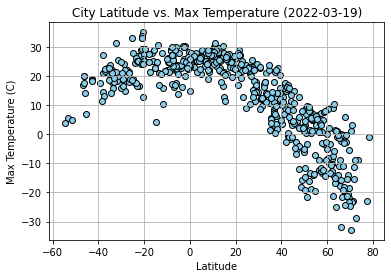

In [8]:
#Creating a Scatter Plot

plt.scatter(cities_pd["Latitude"],cities_pd["Max Temp"], marker = "o", color = "skyblue", edgecolor = 'black')
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/latitude_temp_plot.png')

plt.show()

## Latitude vs. Humidity Plot

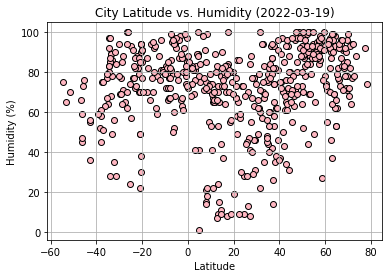

In [9]:
plt.scatter(cities_pd["Latitude"],cities_pd["Humidity"], marker = "o", color = "lightpink", edgecolor = 'black')
plt.title(f"City Latitude vs. Humidity ({today})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/latitude_humidity_plot.png')

plt.show()

## Latitude vs. Cloudiness Plot

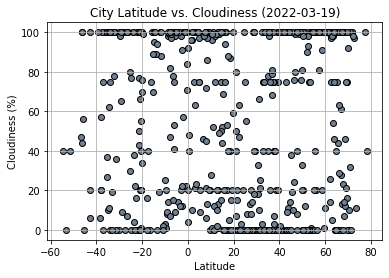

In [10]:
plt.scatter(cities_pd["Latitude"],cities_pd["Cloudiness"], marker = "o", color = "slategray", edgecolor = 'black')
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/latitude_cloudiness_plot.png')

plt.show()

## Latitude vs. Wind Speed Plot

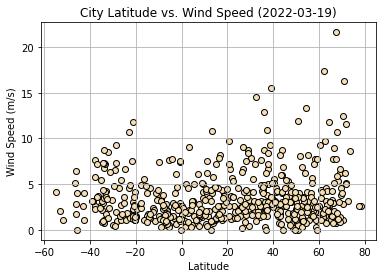

In [11]:
plt.scatter(cities_pd["Latitude"],cities_pd["Wind Speed"], marker = "o", color = "wheat", edgecolor = 'black')
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig('../output_data/latitude_windspeed_plot.png')

plt.show()

## Linear Regression

In [12]:
#Define new dataframes for northern (latitude >0) and southern (latitude <0) hemispheres
northern_hemi = cities_pd.loc[cities_pd['Latitude']>0, :]
# northern_hemi.head()

southern_hemi = cities_pd.loc[cities_pd['Latitude']<0, :]
# southern_hemi.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

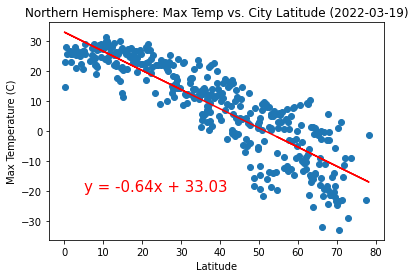

The r-value is -0.8716304591263886


In [13]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi["Latitude"], northern_hemi["Max Temp"])
regress_values = northern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(northern_hemi["Latitude"], northern_hemi["Max Temp"])
plt.plot(northern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Max Temperature (C)')
plt.xlabel("Latitude")
plt.title(f'Northern Hemisphere: Max Temp vs. City Latitude ({today})')
plt.annotate(line_eq, (5, -20), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

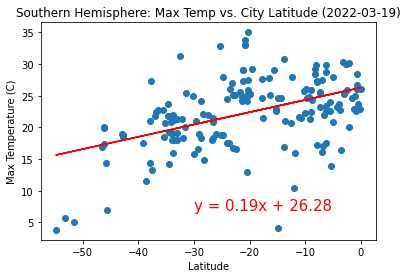

The r-value is 0.4716291688546642


In [14]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi["Latitude"], southern_hemi["Max Temp"])
regress_values = southern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(southern_hemi["Latitude"], southern_hemi["Max Temp"])
plt.plot(southern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Max Temperature (C)')
plt.xlabel("Latitude")
plt.title(f'Southern Hemisphere: Max Temp vs. City Latitude ({today})')
plt.annotate(line_eq, (-30, 7), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

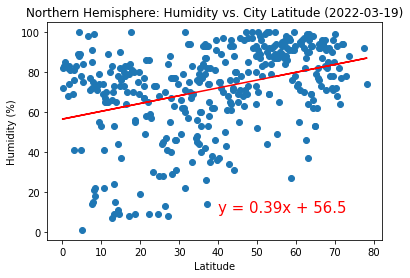

The r-value is 0.3601470391037113


In [15]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi["Latitude"], northern_hemi["Humidity"])
regress_values = northern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(northern_hemi["Latitude"], northern_hemi["Humidity"])
plt.plot(northern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.title(f'Northern Hemisphere: Humidity vs. City Latitude ({today})')
plt.annotate(line_eq, (40, 10), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

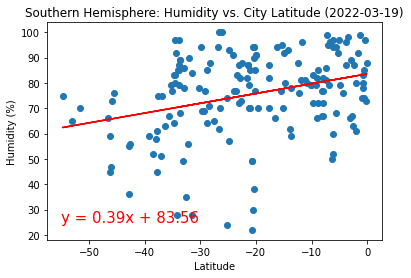

The r-value is 0.31521167077556705


In [16]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi["Latitude"], southern_hemi["Humidity"])
regress_values = southern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(southern_hemi["Latitude"], southern_hemi["Humidity"])
plt.plot(southern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Humidity (%)')
plt.xlabel("Latitude")
plt.title(f'Southern Hemisphere: Humidity vs. City Latitude ({today})')
plt.annotate(line_eq, (-55, 25), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

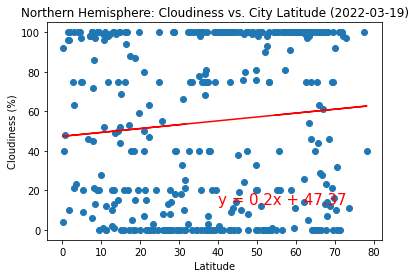

The r-value is 0.09621314112064763


In [17]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi["Latitude"], northern_hemi["Cloudiness"])
regress_values = northern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(northern_hemi["Latitude"], northern_hemi["Cloudiness"])
plt.plot(northern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.title(f'Northern Hemisphere: Cloudiness vs. City Latitude ({today})')
plt.annotate(line_eq, (40, 13), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

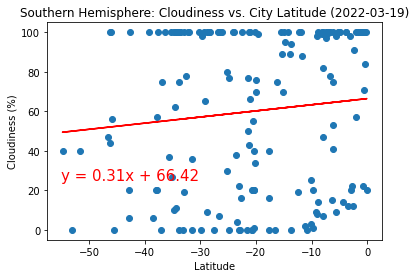

The r-value is 0.10417140582045052


In [18]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi["Latitude"], southern_hemi["Cloudiness"])
regress_values = southern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(southern_hemi["Latitude"], southern_hemi["Cloudiness"])
plt.plot(southern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Cloudiness (%)')
plt.xlabel("Latitude")
plt.title(f'Southern Hemisphere: Cloudiness vs. City Latitude ({today})')
plt.annotate(line_eq, (-55, 25), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

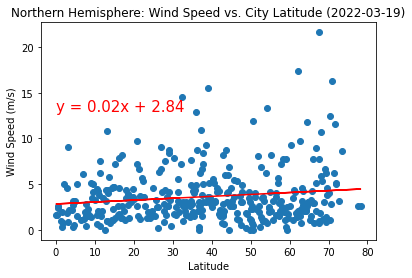

The r-value is 0.14445890571496772


In [19]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi["Latitude"], northern_hemi["Wind Speed"])
regress_values = northern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(northern_hemi["Latitude"], northern_hemi["Wind Speed"])
plt.plot(northern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.title(f'Northern Hemisphere: Wind Speed vs. City Latitude ({today})')
plt.annotate(line_eq, (0, 13), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

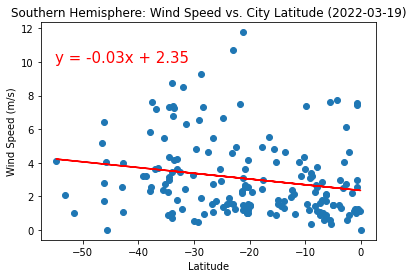

The r-value is -0.20216546140981598


In [20]:
#create regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi["Latitude"], southern_hemi["Wind Speed"])
regress_values = southern_hemi["Latitude"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot regression model
plt.scatter(southern_hemi["Latitude"], southern_hemi["Wind Speed"])
plt.plot(southern_hemi["Latitude"], regress_values, 'r-')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel("Latitude")
plt.title(f'Southern Hemisphere: Wind Speed vs. City Latitude ({today})')
plt.annotate(line_eq, (-55, 10), fontsize = 15, color = 'red')
plt.show()

print(f'The r-value is {rvalue}')

# WeatherPy Observations

Based on the data produced in this notebook, here are three observable trends:

## Trend 1
* One of the most clearly observed weather trends is depicted in the scatter plot of maximum temperature across different latitudes. From the data, you can see that, as the latitude values move further away from zero, the maximum temperature decreases, therefore latitudes closest to zero have recorded the highest maximum temperatures.
* This trend accurately reflects weather patterns globally due to the way the Earth is shaped. At the widest diameter, or the Earth's equator, the sun's light is more direct. Therefore, places closest to the equator (or a latitude close to zero), will experience the hottest temperatures to places towards the North and South Poles.

## Trend 2
* There is a very weak positive correlation between latitude and cloud cover, both for the northern and southern hemisphere samples. If we were to combine these data, you would observe that the higher in latitude you travel, on average there will be slightly more cloud coverage.
* According to [NASA](https://earthobservatory.nasa.gov/images/85843/cloudy-earth), cloud coverage is more common at higher latitudes from the equator due to air being pushed upward.

## Trend 3
* In both the Northern and Southern Hemisphere linear regression plots for wind speed vs. latitude, wind speeds seem to trend down as latitudes get closer to the equator (latitude = 0).
* Wind speed is influenced by air temperature. Higher air temperatures cause a lower air pressure and therefore lower wind speeds, whereas lower temperatures cause higher air pressure and a higher wind speed. [(Source)](https://sciencing.com/list-7651707-four-wind-speed-wind-direction.html)